In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dataset load

df=pd.read_csv('Study_vs_Score_data.csv')
df.head()

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


In [3]:
# Shape of the dataset

df.shape

(1000, 2)

In [4]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Attendance_Hours  1000 non-null   float64
 1   Final_Marks       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


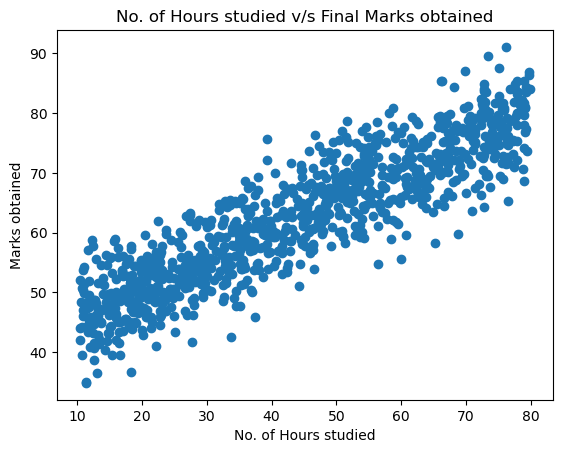

In [5]:
# Data visualization

plt.scatter(df['Attendance_Hours'],df['Final_Marks'])

plt.title('No. of Hours studied v/s Final Marks obtained')
plt.xlabel('No. of Hours studied')
plt.ylabel('Marks obtained')
plt.show()

In [6]:
# Importing Scikit-learn libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
# Splitting data into train and test data

X_train, X_test, y_train, y_test= train_test_split(
    df.drop(columns=['Final_Marks']), df['Final_Marks'], test_size=0.2
)

In [8]:
# Training data shape

X_train.shape

(800, 1)

In [9]:
# Test data shape

X_test.shape

(200, 1)

In [32]:
# Linear Regression class object

lr= LinearRegression()

In [33]:
# Training the model

lr.fit(X_train,y_train)

LinearRegression()

In [34]:
# Output prediction

y_pred= lr.predict(X_test)

In [13]:
# Importing Scikit-learn metrics libraries

from sklearn.metrics import r2_score, root_mean_squared_error

In [35]:
# Model evaluation

print('R2 Score: ', r2_score(y_test,y_pred))
print('Root Mean Squared Error: ',root_mean_squared_error(y_test,y_pred))

R2 Score:  0.7868435060027539
Root Mean Squared Error:  5.0177246096722925


In [15]:
# Slope value

print('m: ',lr.coef_)

m:  [0.4934383]


In [16]:
# Intercept value

print('b: ',lr.intercept_)

b:  40.84174904553406


## Making our own Simple Linear Regression class:

In [26]:
class simple_linear_regression:

    def __init__(self):

        self.slope = None
        self.intercept = None

    def fit(self, X_train, y_train):

        num = 0
        denom = 0
        X_mean = X_train.mean()
        y_mean = y_train.mean()

        # Converting dataframe into flattened array
        X_train = X_train.values.ravel() 
        y_train = y_train.values.ravel()

        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_mean) * (y_train[i] - y_mean))
            denom = denom + ((X_train[i] - X_mean) * (X_train[i] - X_mean))

        self.slope = num / denom
        self.intercept = y_train.mean() - (self.slope * X_train.mean())

    def predict(self, X_test):
        
        y_pred = self.slope * X_test + self.intercept
        return y_pred

In [36]:
slr= simple_linear_regression()

In [37]:
# Model training

slr.fit(X_train, y_train)

In [38]:
# Output prediction

y_pred1= slr.predict(X_test)

In [40]:
# Model evaluation

print('R2 score: ',r2_score(y_test,y_pred1))
print('Root Mean Squared Error: ',root_mean_squared_error(y_test,y_pred1))

R2 score:  0.7868435060027541
Root Mean Squared Error:  5.01772460967229


In [43]:
# Difference in evaluation score

print('R2 score difference: ',r2_score(y_test,y_pred1)-r2_score(y_test,y_pred))
print('Root Mean Squared Error difference: ',root_mean_squared_error(y_test,y_pred1)-root_mean_squared_error(y_test,y_pred))

R2 score difference:  2.220446049250313e-16
Root Mean Squared Error difference:  -2.6645352591003757e-15
